In [29]:
import pandas as pd

In [1]:
data = pd.read_csv("../../data/covid19_usa.csv")

data.set_index("id", inplace=True)
data.head()

,date,FIPS,lat,lon,state,abbr,location,cases,death
id,,,,,,,,,
NY0000000,2020-06-22,36103.0,40.883201,-72.801217,New York,NY,Suffolk,41010,1965
NY0000001,2020-06-22,36105.0,41.715795,-74.763946,New York,NY,Sullivan,1438,45
NC0000002,2020-06-22,37133.0,34.726074,-77.429082,North Carolina,NC,Onslow,221,3
ND0000003,2020-06-22,38001.0,46.096869,-102.528540,North Dakota,ND,Adams,0,0
OH0000004,2020-06-22,39063.0,41.002505,-83.668389,Ohio,OH,Hancock,63,5


In [2]:
data.isna().sum()

date           0
FIPS        7300
lat            0
lon            0
state          0
abbr           0
location       0
cases          0
death          0
dtype: int64

In [3]:
# show null rows of FIPS
data[data["FIPS"].isna()]  # look a bit weird, but it's ok for now...

,date,FIPS,lat,lon,state,abbr,location,cases,death
id,,,,,,,,,
UT0000161,2020-06-23,NaN,38.996171,-110.701396,Utah,UT,Southeast Utah,31,0
UT0000831,2020-06-16,NaN,41.271160,-111.914512,Utah,UT,Weber-Morgan,539,9
UT0001232,2020-06-14,NaN,39.372319,-111.575868,Utah,UT,Central Utah,75,0
UT0001619,2021-08-10,NaN,41.521068,-113.083282,Utah,UT,Bear River,23694,119
MI0002598,2021-07-16,NaN,0.000000,0.000000,Michigan,MI,Michigan Department of Corrections (MDOC),26760,153
...,...,...,...,...,...,...,...,...,...
MO2399602,2021-11-26,NaN,39.099700,-94.578600,Missouri,MO,Kansas City,66830,864
UT2399989,2021-11-02,NaN,39.372319,-111.575868,Utah,UT,Central Utah,13863,110
UT2400217,2021-11-04,NaN,40.124915,-109.517442,Utah,UT,TriCounty,8476,70


In [5]:
# show null rows of City/County/Borough/Region
data[data["location"].isna()]  # look a bit weird, but it's ok for now...

,date,FIPS,lat,lon,state,abbr,location,cases,death
id,,,,,,,,,


***Conclusion:*** *We can see that there are some null values in the data, but it's ok for now...*
### Missing values is not a problem for now, but we will need to deal with it later.

## Clean data

In [7]:
data["date"] = pd.to_datetime(data["date"])
data["date"].describe()

count                          2338190
mean     2021-02-28 12:00:00.000000768
min                2020-03-01 00:00:00
25%                2020-08-30 00:00:00
50%                2021-02-28 12:00:00
75%                2021-08-30 00:00:00
max                2022-02-28 00:00:00
Name: date, dtype: object

In [8]:
# some location is not in the US
data[data["location"].str.contains("out of", case=False)]

,date,FIPS,lat,lon,state,abbr,location,cases,death
id,,,,,,,,,
MA0000102,2020-06-23,80025.0,0.0,0.0,Massachusetts,MA,Out of MA,0,0
CA0000180,2020-06-24,80006.0,0.0,0.0,California,CA,Out of CA,0,0
MS0000232,2020-06-24,80028.0,0.0,0.0,Mississippi,MS,Out of MS,0,0
OH0000256,2020-06-24,80039.0,0.0,0.0,Ohio,OH,Out of OH,0,0
ME0000354,2020-06-13,80023.0,0.0,0.0,Maine,ME,Out of ME,0,0
...,...,...,...,...,...,...,...,...,...
ND2401446,2022-02-20,80038.0,0.0,0.0,North Dakota,ND,Out of ND,0,0
DE2401493,2022-02-21,80010.0,0.0,0.0,Delaware,DE,Out of DE,0,0
LA2401637,2022-02-22,80022.0,0.0,0.0,Louisiana,LA,Out of LA,0,0


what is the meaning of 'out of'?

***Conclusion:*** *We can see that there are some rows that are not in the US, remove them.*


In [9]:
data = data[~data["location"].str.contains("out of", case=False)]
# check again
data[data["location"].str.contains("out of", case=False)]

,date,FIPS,lat,lon,state,abbr,location,cases,death
id,,,,,,,,,


### some location is not real

In [10]:
# if lat or lon is 0, then it's not a real location
data[(data["lat"] == 0) | (data["lon"] == 0)]

,date,FIPS,lat,lon,state,abbr,location,cases,death
id,,,,,,,,,
MI0002598,2021-07-16,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),26760,153
MI0005325,2020-05-14,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),2257,56
MI0005902,2020-05-11,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),2169,54
MI0008348,2021-05-26,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),26863,150
MI0011213,2021-07-01,NaN,0.0,0.0,Michigan,MI,Federal Correctional Institution (FCI),320,5
...,...,...,...,...,...,...,...,...,...
MI2384996,2021-12-20,NaN,0.0,0.0,Michigan,MI,Federal Correctional Institution (FCI),321,5
MI2385690,2021-12-23,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),28542,163
MI2386617,2021-10-16,NaN,0.0,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),27162,153


In [13]:
# any cell other than lat and lon is 0?
data.loc[
    (data["lat"] == 0) | (data["lon"] == 0), data.columns != "lat"
]  # FIPS is null, it's ok for now...

,date,FIPS,lon,state,abbr,location,cases,death
id,,,,,,,,
MI0002598,2021-07-16,NaN,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),26760,153
MI0005325,2020-05-14,NaN,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),2257,56
MI0005902,2020-05-11,NaN,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),2169,54
MI0008348,2021-05-26,NaN,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),26863,150
MI0011213,2021-07-01,NaN,0.0,Michigan,MI,Federal Correctional Institution (FCI),320,5
...,...,...,...,...,...,...,...,...
MI2384996,2021-12-20,NaN,0.0,Michigan,MI,Federal Correctional Institution (FCI),321,5
MI2385690,2021-12-23,NaN,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),28542,163
MI2386617,2021-10-16,NaN,0.0,Michigan,MI,Michigan Department of Corrections (MDOC),27162,153


### Where are these locations? 

***Conclusion:*** other details still look ok, so we can keep them for now.


### try to find the location of the null FIPS

In [14]:
data[data["FIPS"].isna()]

,date,FIPS,lat,lon,state,abbr,location,cases,death
id,,,,,,,,,
UT0000161,2020-06-23,NaN,38.996171,-110.701396,Utah,UT,Southeast Utah,31,0
UT0000831,2020-06-16,NaN,41.271160,-111.914512,Utah,UT,Weber-Morgan,539,9
UT0001232,2020-06-14,NaN,39.372319,-111.575868,Utah,UT,Central Utah,75,0
UT0001619,2021-08-10,NaN,41.521068,-113.083282,Utah,UT,Bear River,23694,119
MI0002598,2021-07-16,NaN,0.000000,0.000000,Michigan,MI,Michigan Department of Corrections (MDOC),26760,153
...,...,...,...,...,...,...,...,...,...
MO2399602,2021-11-26,NaN,39.099700,-94.578600,Missouri,MO,Kansas City,66830,864
UT2399989,2021-11-02,NaN,39.372319,-111.575868,Utah,UT,Central Utah,13863,110
UT2400217,2021-11-04,NaN,40.124915,-109.517442,Utah,UT,TriCounty,8476,70


### Where are these locations?

***Conclusion:*** *We can see that there are some rows that are the FIPS is null, it's ok for now...*

### About negative values?

infected total and death total should not be negative

In [17]:
# check infected total
data[data["cases"] < 0]  # ok, not have negative values

,date,FIPS,lat,lon,state,abbr,location,cases,death
id,,,,,,,,,


In [18]:
# check death total
data[data["death"] < 0]  # ok, not have negative values

,date,FIPS,lat,lon,state,abbr,location,cases,death
id,,,,,,,,,


### How about City/County/Borough/Region? some of them are not in the US?


In [20]:
# check a City/County/Borough/Region list all of them
data["location"].nunique()  # 1848 too many, we can't check them one by one
# it's ok for now...

1850

### Outliers detection

how to detect outliers?

In [21]:
# try to find outliers by plot graph
# get sample data
sample_data = data.sample(1000)

### infected total

<Axes: xlabel='date', ylabel='cases'>

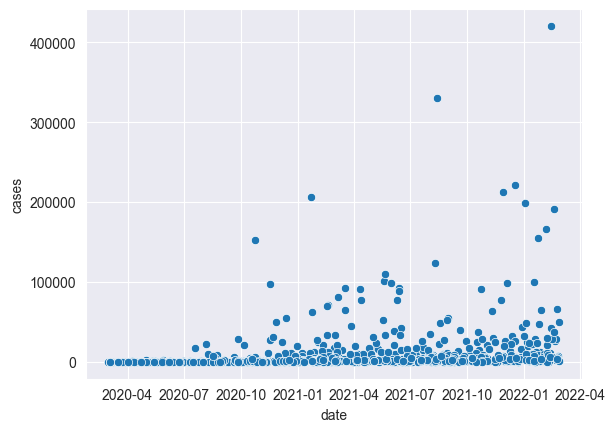

In [22]:
# plot infected total
import seaborn as sns

sns.scatterplot(x="date", y="cases", data=sample_data)

"It appears that there are outliers present in the total number of infections.
 However, it's essential to refrain from immediate removal,
  as further examination and validation of the data will be necessary during subsequent stages of analysis."

# try with all 
### infected total


<Axes: xlabel='date', ylabel='cases'>

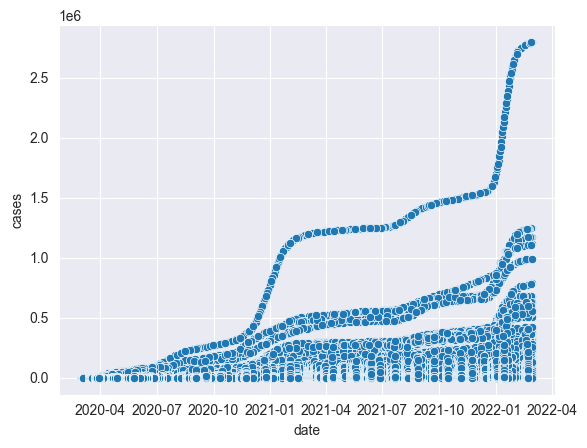

In [23]:
# plot infected total
sns.scatterplot(x="date", y="cases", data=data)

"Upon closer examination, it becomes evident that the apparent outlier is not an anomaly but rather a significant value.
 As a result, it would not be appropriate to consider its removal from the dataset."

### death total?

<Axes: xlabel='date', ylabel='death'>

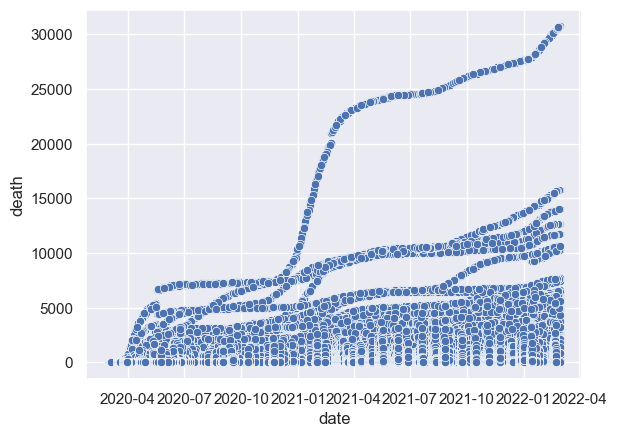

In [39]:
sns.scatterplot(x="date", y="death", data=data)

***Conclusion:*** *from now we assume that there are no outliers in the data.*

In [40]:
# save clean data
data.to_csv("../../data/clean_data.csv")